<a href="https://colab.research.google.com/github/tarunmer77/assignment-NeuralNetwork/blob/main/forestfires_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
import pandas as pd
import numpy 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [6]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
data.shape

(517, 31)

In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [11]:
data.drop(['month','day'],axis=1,inplace=True)

In [12]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [13]:
le = LabelEncoder()

In [14]:
data['size_category'] = le.fit_transform(data['size_category'])

In [15]:
# Model Building

In [16]:
x = data.drop('size_category',axis=1)
y = data['size_category']

In [17]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [19]:
# Standardization

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [21]:
# Splitting data into test and train

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=15,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413,), (104,))

In [23]:
model = Sequential()
model.add(Dense(28,input_dim=28,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
# Compiling the model

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
# Model Training

In [27]:
model.fit(X_train,y_train,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
28/28 [==============================] - 1s 11ms/step - loss: 0.6408 - accuracy: 0.7210 - val_loss: 0.6473 - val_accuracy: 0.7445
Epoch 2/150
28/28 [==============================] - 0s 4ms/step - loss: 0.6047 - accuracy: 0.7246 - val_loss: 0.6328 - val_accuracy: 0.7445
Epoch 3/150
28/28 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.7246 - val_loss: 0.6238 - val_accuracy: 0.7445
Epoch 4/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7283 - val_loss: 0.6175 - val_accuracy: 0.7445
Epoch 5/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.7283 - val_loss: 0.6159 - val_accuracy: 0.7445
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7319 - val_loss: 0.6162 - val_accuracy: 0.7591
Epoch 7/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7391 - val_loss: 0.6171 - val_accuracy: 0.7664
Epoch 8/150


In [28]:
# Model Testing

In [29]:
y_pred_train = model.predict(X_train)
rounded = [round(x[0]) for x in y_pred_train]

In [30]:
y_pred_train1 = pd.DataFrame(rounded)

In [31]:
y_pred_train1

,0
0,1
1,1
2,1
3,1
4,1
...,...
408,1
409,1
410,0
411,1


In [32]:
y_pred_test = model.predict(X_test)
rounded1    = [round(x[0]) for x in y_pred_test]

In [33]:
y_pred_test1 = pd.DataFrame(rounded1)
y_pred_test1

,0
0,0
1,1
2,1
3,1
4,1
...,...
99,0
100,1
101,1
102,1


In [34]:
# Model Evaluation


In [35]:
Accuracy_Train = model.evaluate(X_train,y_pred_train1,verbose=0)
Accuracy_Train

[0.010790713131427765, 1.0]

In [36]:
Accuracy_Test = model.evaluate(X_test,y_pred_test1,verbose=0)
Accuracy_Test

[0.02205720543861389, 1.0]

In [37]:
# Visualizing Accuracy and Loss

In [38]:
History = model.fit(X_test,y_pred_test1,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
7/7 [==============================] - 0s 18ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 4/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 5/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 8/150
7/7 [========

In [39]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

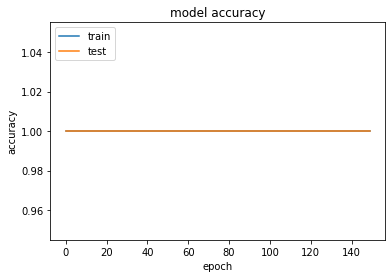

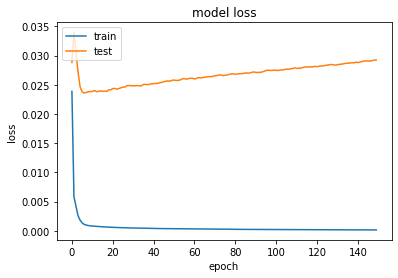

In [40]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Tuning Of Hyperparameters : Batch Size and epochs

In [42]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [45]:
# create model
def create_model():
    model1 = Sequential()
    model1.add(Dense(30, input_dim=28, activation='relu'))
    model1.add(Dense(28, activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))
    
   
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

In [46]:
# Create the model

model2 = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters

param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model2,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.962 total time=   1.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.750 total time=   1.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.563 total time=   2.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.689 total time=   1.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.728 total time=   1.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [47]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8780246615409851, using {'batch_size': 10, 'epochs': 100}
0.7384241819381714,0.1289703799982274 with: {'batch_size': 10, 'epochs': 10}
0.849010455608368,0.06310728335591141 with: {'batch_size': 10, 'epochs': 50}
0.8780246615409851,0.0473096543996193 with: {'batch_size': 10, 'epochs': 100}
0.7519790887832641,0.1248620216743414 with: {'batch_size': 20, 'epochs': 10}
0.8412808060646058,0.06816972173248197 with: {'batch_size': 20, 'epochs': 50}
0.864488422870636,0.06019139105809694 with: {'batch_size': 20, 'epochs': 100}
0.734466016292572,0.15338269587518782 with: {'batch_size': 40, 'epochs': 10}
0.7773338317871094,0.08502831168630647 with: {'batch_size': 40, 'epochs': 50}
0.8470126867294312,0.06722819311112345 with: {'batch_size': 40, 'epochs': 100}


In [48]:
# Tuning of Hyperparameter : Number of Neurons in activation layer

In [49]:
# Defining the model

def create_model1(neuron1,neuron2):
    model3 = Sequential()
    model3.add(Dense(neuron1,input_dim = 28,activation = 'relu'))
    model3.add(Dense(neuron2,activation = 'relu'))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model3

In [50]:
# Create the model

model4 = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [24,28,35]
neuron2 = [20,24,28]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid2        = GridSearchCV(estimator = model4,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 1/5; 1/9] END .......neuron1=24, neuron2=20;, score=0.962 total time=   1.0s
[CV 2/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 2/5; 1/9] END .......neuron1=24, neuron2=20;, score=0.750 total time=   0.9s
[CV 3/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 3/5; 1/9] END .......neuron1=24, neuron2=20;, score=0.534 total time=   1.1s
[CV 4/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 4/5; 1/9] END .......neuron1=24, neuron2=20;, score=0.689 total time=   0.9s
[CV 5/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 5/5; 1/9] END .......neuron1=24, neuron2=20;, score=0.699 total time=   0.9s
[CV 1/5; 2/9] START neuron1=24, neuron2=24......................................
[CV 1/5; 2/9] END .......neuron1=24, neuron2=24;,

In [51]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.744249427318573, using {'neuron1': 35, 'neuron2': 28}
0.726773715019226,0.13783731616669082 with: {'neuron1': 24, 'neuron2': 20}
0.7190067172050476,0.13718375110904218 with: {'neuron1': 24, 'neuron2': 24}
0.7364264369010926,0.14294962235195152 with: {'neuron1': 24, 'neuron2': 28}
0.7325429439544677,0.15044226118005988 with: {'neuron1': 28, 'neuron2': 20}
0.7306011915206909,0.15278633950214154 with: {'neuron1': 28, 'neuron2': 24}
0.7422330141067505,0.1452778850024509 with: {'neuron1': 28, 'neuron2': 28}
0.744193434715271,0.1368854696410139 with: {'neuron1': 35, 'neuron2': 20}
0.7344846963882447,0.1452069523806895 with: {'neuron1': 35, 'neuron2': 24}
0.744249427318573,0.11643770880999836 with: {'neuron1': 35, 'neuron2': 28}


In [52]:
# Tuning Hyperparameter : Activation Function

In [53]:
# Defining the model

def create_model2(activation_function):
    model4 = Sequential()
    model4.add(Dense(28,input_dim = 28,activation = activation_function))
    model4.add(Dense(24,activation = activation_function))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model4

In [54]:
# Create the model

model5 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function=activation_function)

# Build and fit the GridSearchCV

grid3        = GridSearchCV(estimator = model5,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(x_scaled,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START activation_function=softmax.................................
[CV 1/5; 1/3] END ..activation_function=softmax;, score=1.000 total time=   1.1s
[CV 2/5; 1/3] START activation_function=softmax.................................
[CV 2/5; 1/3] END ..activation_function=softmax;, score=0.750 total time=   1.0s
[CV 3/5; 1/3] START activation_function=softmax.................................
[CV 3/5; 1/3] END ..activation_function=softmax;, score=0.524 total time=   0.9s
[CV 4/5; 1/3] START activation_function=softmax.................................
[CV 4/5; 1/3] END ..activation_function=softmax;, score=0.680 total time=   1.0s
[CV 5/5; 1/3] START activation_function=softmax.................................
[CV 5/5; 1/3] END ..activation_function=softmax;, score=0.699 total time=   1.0s
[CV 1/5; 2/3] START activation_function=relu....................................
[CV 1/5; 2/3] END .....activation_function=relu;,

In [55]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7461351752281189, using {'activation_function': 'tanh'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax'}
0.7267363548278809,0.15009068975270679 with: {'activation_function': 'relu'}
0.7461351752281189,0.13733239151926718 with: {'activation_function': 'tanh'}


In [57]:
# best result is when the Activation function is 'tanh'